## CAPSTONE PROJECT ##

### PROJECT DESCRIPTION ###

**The aim of this project is to develop a machine learning model to predict whether a persons income exceeds $50k/yr based on census data. By leveraging various census data, I will explore the dataset, engineerer relevant features, build and evaluate my predictive model and provide insight from Exploratory Data Analysis.**

This project presnts a classification problem; Binary Classification where an Individual income is either less than 50k or greater than 50k.

### Models Used ###
1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest
4. Support Vector Machine
5. XGBoost Classifier

#### IMPORTING LIBRARIES ####

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use("ggplot")

#Handling warnings
import warnings
warnings.filterwarnings('ignore')

#Importing Joblib
import joblib

#Importing Scikit Learn modules for machine learning

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import(
  accuracy_score,
  recall_score,
  f1_score,
  precision_score,
  classification_report,
  confusion_matrix,
  roc_auc_score,
  roc_curve,
  RocCurveDisplay
)
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [150]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


#### LOADING MY DATA INTO A DATAFRAME ####

In [2]:
file = 'income_data.csv' #passing my csv file to a variable name.
df = pd.read_csv(file) #passing my csv file into pandas dataframe.

#### DATA EXPLORATION AND UNDERSTANDING ####

In [4]:
display(df.head(5))#displaying the first five rows to give an overview of what the dataset looks like

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape #checking how large my dataset is.

(48842, 15)

**From the df.shape method, I can tell I have 48,842 records.**

In [7]:
df.dtypes #checking the datatypes present in this dataset

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [8]:
df.info() #getting information about my data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
df.describe().T #Getting summary statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
capital-gain,48842.0,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0
capital-loss,48842.0,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0
hours-per-week,48842.0,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0


#### DATA CLEANING ####

In [11]:
df.duplicated().sum() # This tells us the total no of duplicated records in the DataFrame.

48

**From the above, we can see that we have 48 duplicated records and we would be dropping them.**

In [13]:
df = df.drop_duplicates()
df.shape #checking if new shape after duplicates records have being dropped

(48794, 15)

**After dropping the duplicates, there is a reduction in the number of records as seen above.**

In [24]:
df['workclass'].unique() #checking the categories present in the workclass variable

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked',
       nan], dtype=object)

In [25]:
df['native-country'].unique() #checking the categories present in the native country variable

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands', nan], dtype=object)

In [28]:
df['occupation'].unique() #checking the categories present in the occupation variable

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv', nan], dtype=object)

I checked unique values for three columns and I observed that '?' are represented in some and so i will replace it with 'Nan'.

In [31]:
#Replacing'?' with NaN
df.replace('?',np.nan,inplace=True)

In [33]:
df.isna().sum() #This returns sum of the null values we have per colums

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     856
income               0
dtype: int64

**The above shows we have three columns with null values**

#### Missing Values Bias Analysis ####

This analysis is carried out to ascertain whether missing values in categorical columns (workclass, occupation, native-country) are random or potentially biased, I will compare the income distribution between rows with and without missing values in each column.

In [37]:
#Checking how bias missing data is in relation to income
cols_with_nulls = ['workclass', 'occupation', 'native-country']  # columns with null values
target = 'income'  # target column

for col in cols_with_nulls:
    df['missing_flag'] = df[col].isnull() #passing the null values to a new column
    print(f"\n=== Missingness Analysis for: {col} ===")
    result = df.groupby('missing_flag')[target].value_counts(normalize=True).unstack()
    print(result)


=== Missingness Analysis for: workclass ===
income           <=50K      >50K
missing_flag                    
False         0.751799  0.248201
True          0.905323  0.094677

=== Missingness Analysis for: occupation ===
income           <=50K      >50K
missing_flag                    
False         0.751745  0.248255
True          0.905660  0.094340

=== Missingness Analysis for: native-country ===
income           <=50K      >50K
missing_flag                    
False         0.760920  0.239080
True          0.742991  0.257009


In [39]:
df['occupation'] = df['occupation'].fillna(value='Missing') #filling null values in the column called occupation using its mode.

In [41]:
df['workclass'] = df['workclass'].fillna(value='Missing') #filling null values in the column called workclass using its mode.

In [43]:
df['native-country'] = df['native-country'].fillna(value='Missing') #filling null values in the column called native-country using its mode.

In [45]:
df.isna().sum() #checking if the null values have being cleaned

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
missing_flag      0
dtype: int64

##### Handling Missing Values: Justification

After conducting missingness analysis on `workclass`, `occupation`, and `native-country`, the results revealed the following:

- **`workclass` and `occupation`**: The proportion of individuals with missing values in these columns were **heavily skewed toward the ≤50K income group**, indicating that the missingness is **not random**. This suggests the absence of this information could hold predictive value — possibly reflecting underemployment or data gaps for lower-income individuals.
- **`native-country`**: Missing values showed **no strong skew**, and were almost evenly distributed. Therefore, imputing might not add much value.

#####  Action Taken:
To avoid introducing bias through imputation ( mode), I replaced missing values in all three columns with the placeholder string `'Missing'` and I also added a temporary column called missing_flag-contains boolean values- It was used to distinguish between rows with and without missing values. This column was used to evaluate whether the missing data in workclass, occupation and native country was randomly distributed or biased with respect to the target variable(income). After Analysis, the missing_flag column will be dropped as it is no longer needed for modelling or further analyis.

This allows:
- Preservation of all data rows,
- The model to learn from missingness as a potential signal,
- Avoidance of assumptions tied to dominant groups.

In [48]:
df.shape

(48794, 16)

##### DROPPING IRRELEVANT COLUMNS #####

In [51]:
df.drop(columns=['fnlwgt','education-num','missing_flag'], inplace = True)

In [53]:
df.head() #previewing dataset after dropping irrelevant column

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [55]:
df.shape #Checking the shape after dropping irrelevant column

(48794, 13)

#### Checking for outliers and handling them ####

In [58]:
#Checking for outliers in age
Q1 = df['age'].quantile(0.25) #caluating Q1 Value
Q3 = df['age'].quantile(0.75) #caluating Q3 Value
IQR = Q3 - Q1 #caluating IQR Value

lower_bound = Q1 - 1.5 * IQR #calculating Lower boundary
upper_bound = Q3 + 1.5 * IQR #calculating Upper boundary

# Find outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"Total number of outlier entries: {len(outliers)}")
print("Outliers values in age:")
print(outliers['age'].unique())

Total number of outlier entries: 215
Outliers values in age:
[79 90 80 81 88 82 83 84 85 86 87 89]


#### Insight on Age
After checking for outliers in the `age` column, all values fell within a realistic human working age range. There were no extreme values (such as <18 or >100), indicating that the data in this column is valid and does not require any removal or transformation. Age will be retained as it is for further analysis.

In [61]:
#Checking for outliers in capital gain
Q1 = df['capital-gain'].quantile(0.25) #caluating Q1 Value
Q3 = df['capital-gain'].quantile(0.75) #caluating Q3 Value
IQR = Q3 - Q1 #caluating IQR Value

lower_bound = Q1 - 1.5 * IQR #calculating Lower boundary
upper_bound = Q3 + 1.5 * IQR #calculating Upper boundary

# Find outliers
outliers = df[(df['capital-gain'] < lower_bound) | (df['capital-gain'] > upper_bound)]
print("Number of outliers in capital-gain:", len(outliers))
print("Outliers values in capital-gain:")
print(outliers['capital-gain'].unique())

Number of outliers in capital-gain: 4035
Outliers values in capital-gain:
[ 2174 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386  7298
  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111  8614
  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580  3471
  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961 27828
  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942   914
   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040  4416
  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418  3432
  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848  3887
  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797  1173
  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060  1264  7262
  1731  6612]


#### Insight on Capital Gain
The `capital-gain` column contains a large number of zero entries and a few very high values. These high values are not considered errors but instead represent income disparities present in real-world financial data. They capture meaningful variations in financial status, especially relevant to income prediction, so no values were removed. However, the feature may later benefit from a log transformation to reduce skewness during model building.

In [64]:
#Checking for outliers in capital loss
Q1 = df['capital-loss'].quantile(0.25) #caluating Q1 Value
Q3 = df['capital-loss'].quantile(0.75) #caluating Q3 Value
IQR = Q3 - Q1 #caluating IQR Value

lower_bound = Q1 - 1.5 * IQR #calculating Lower boundary
upper_bound = Q3 + 1.5 * IQR #calculating Upper boundary

# Find outliers
outliers = df[(df['capital-loss'] < lower_bound) | (df['capital-loss'] > upper_bound)]
print("Number of outliers in capital-loss:", len(outliers))
print("Outliers values in capital-loss:")
print(outliers['capital-loss'].unique())

Number of outliers in capital-loss: 2282
Outliers values in capital-loss:
[2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876 1340
 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392
 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547 2174
 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004 2231
 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603 2282
  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155 3900
 2201 1944 2467 2163 2754 2472 1411 1429 3175 1510 1870 1911 2465 1421]


#### Insight on Capital Loss
Like `capital-gain`, the `capital-loss` column has many zero entries and a few high values. These represent actual financial losses reported by individuals and reflect socioeconomic differences. The values are considered valid and were retained for further modeling. Log transformation may be applied later to handle skewness.

In [67]:
#Checking for outliers in hours-per-week
Q1 = df['hours-per-week'].quantile(0.25) #caluating Q1 Value
Q3 = df['hours-per-week'].quantile(0.75) #caluating Q3 Value
IQR = Q3 - Q1 #caluating IQR Value

lower_bound = Q1 - 1.5 * IQR #calculating Lower boundary
upper_bound = Q3 + 1.5 * IQR #calculating Upper boundary

# Find outliers
outliers = df[(df['hours-per-week'] < lower_bound) | (df['hours-per-week'] > upper_bound)]
print("Number of outliers in hours-per-week:", len(outliers))
print("Outliers values in hours-per-week:")
print(outliers['hours-per-week'].unique())

Number of outliers in hours-per-week: 13486
Outliers values in hours-per-week:
[13 16 80 30 60 20 15 25 55 58 32 70  2 22 56 28 24 12 65  1 10 75 98 54
  8  6 64 19 18 72  5  9 21 26 14  4 59  7 99 53 62 57 78 90 66 11 84  3
 17 68 27 85 31 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61
 74 95 79 69]


In [69]:
print("Before filtering:", df.shape)
df = df[(df['hours-per-week'] >= 10) & (df['hours-per-week'] <= 100)]
print("After filtering:", df.shape)

Before filtering: (48794, 13)
After filtering: (48094, 13)


I filtered out records where `hours-per-week` was less than 10 or greater than 100, as such values were considered implausible based on real-world working conditions. This led to a slight reduction in the dataset size, helping improve data quality and model reliability.

#### **EXPLORATORY DATA ANALYSIS** ####

#### **Insight On Target Distribution**

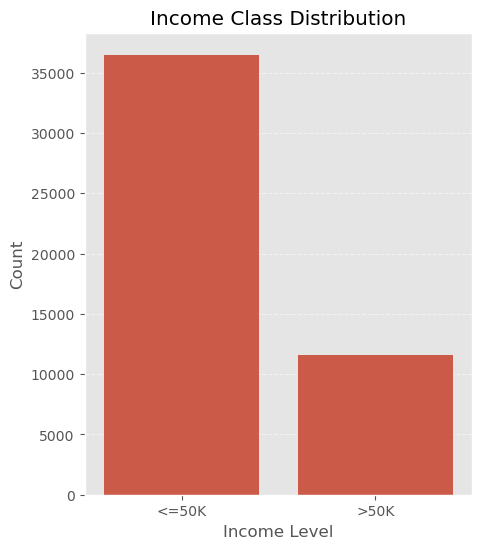

In [74]:
# Plot of the distribution of the income target
plt.figure(figsize=(5,6))
sns.barplot(x=df['income'].value_counts().index, y=df['income'].value_counts().values)
plt.title('Income Class Distribution')
plt.ylabel('Count')
plt.xlabel('Income Level')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

##### *The dataset is imbalanced, with a significantly higher number of individuals earning <=50K compared to >50K.*

#### **Demographic Factors**

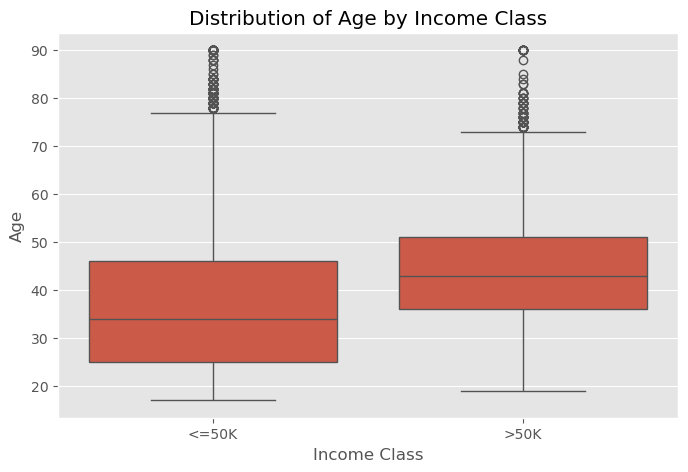

In [88]:
#Distribution of age by income class.
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='age', data=df)
plt.title("Distribution of Age by Income Class")
plt.xlabel("Income Class")
plt.ylabel("Age")
plt.show()

##### *From the boxplot, I observed that high-income earners (>50K) tend to be older on average.*

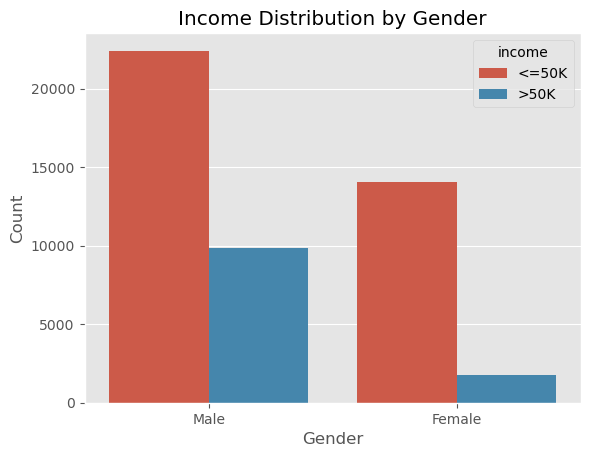

In [91]:
sns.countplot(x='sex', hue='income', data=df)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig("Income_distribution_Gender.png", dpi=300, bbox_inches='tight')
plt.show()

##### *A larger number of males earn >50K compared to females.*

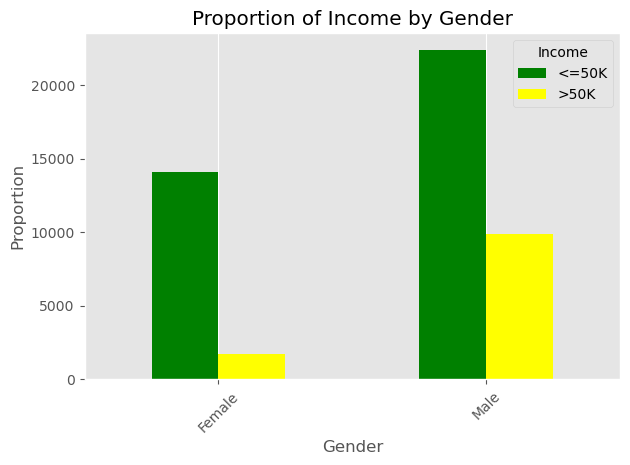

In [95]:
#Gender compared to income
gender_income = df.groupby('sex')['income'].value_counts().unstack()
gender_income.plot(kind='bar',color = ['green','yellow'])
plt.title('Proportion of Income by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.legend(title='Income')
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

##### *From the chart above, it is seen that a greater percentage of females earn less than 50k while a greater percentage of male earn less than 50k.*

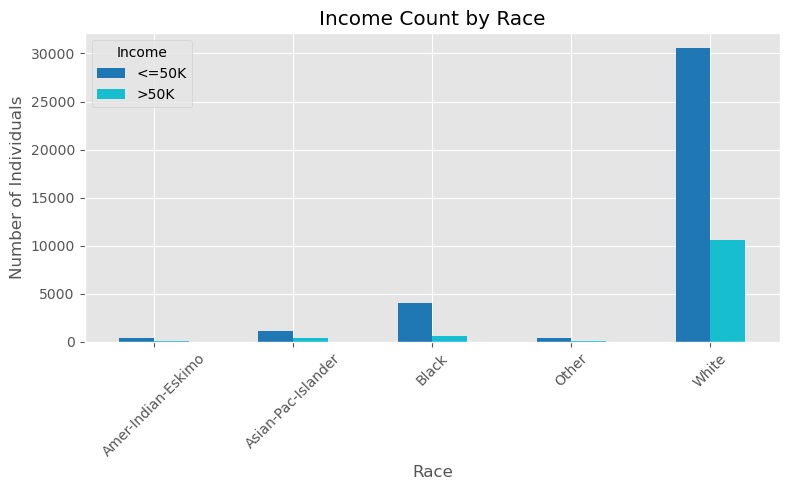

In [97]:
race_income_counts = df.groupby('race')['income'].value_counts().unstack()
race_income_counts.plot(kind='bar', figsize=(8,5), colormap='tab10')
plt.title("Income Count by Race")
plt.ylabel("Number of Individuals")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.legend(title="Income")
plt.tight_layout()
plt.show()

##### *The chart above reveals that the white are much more dominated than any other race; They have a lot more workers earning greater than 50k and also a lot more of workers earning less than 50k*

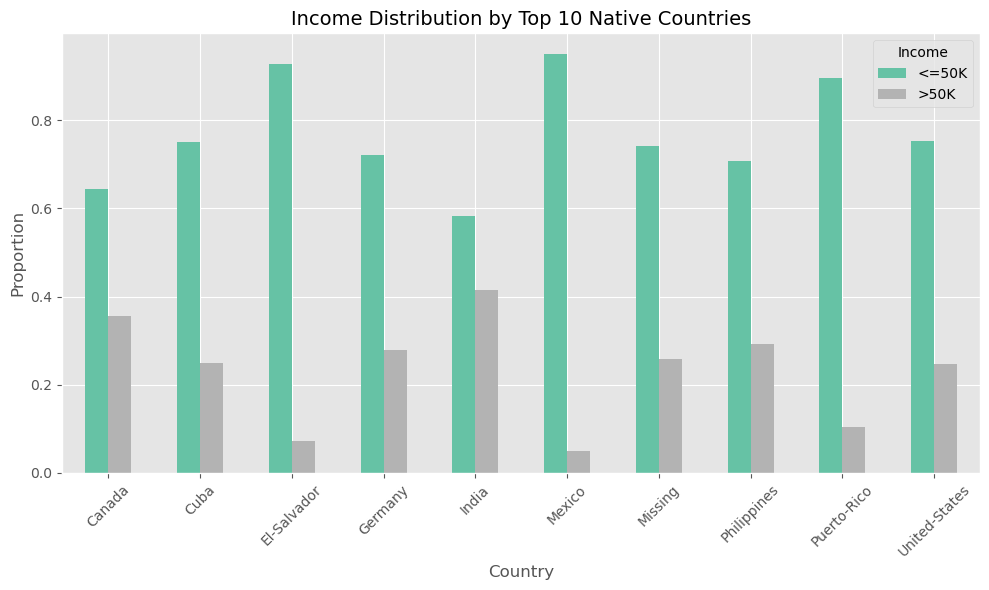

In [101]:
#Getting top 10 native countries by frequency
top_countries = df['native-country'].value_counts().head(10).index

#Filtering dataframe to include only those top countries
df_country_filtered = df[df['native-country'].isin(top_countries)]

#Grouping by country and income to get normalized proportions
country_income_prop = df_country_filtered.groupby('native-country')['income'].value_counts(normalize=True).unstack()

# Plot as bar chart
country_income_prop.plot(
    kind='bar',
    stacked=False,
    figsize=(10, 6),
    colormap='Set2'
)
# Titles and labels
plt.title("Income Distribution by Top 10 Native Countries", fontsize=14)
plt.ylabel("Proportion", fontsize=12)
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

**Insight**
##### *The chart reveals how income levels vary across the top 10 countries in the dataset. Some countries like India, Canada, Phillipines show a relatively higher percentage of individuals earning above 50K, indicating that country of origin might influence income, potentially due to differences in education or job opportunities. It is worthy of note that the countries that were missing ranked among the top 10 countries.*

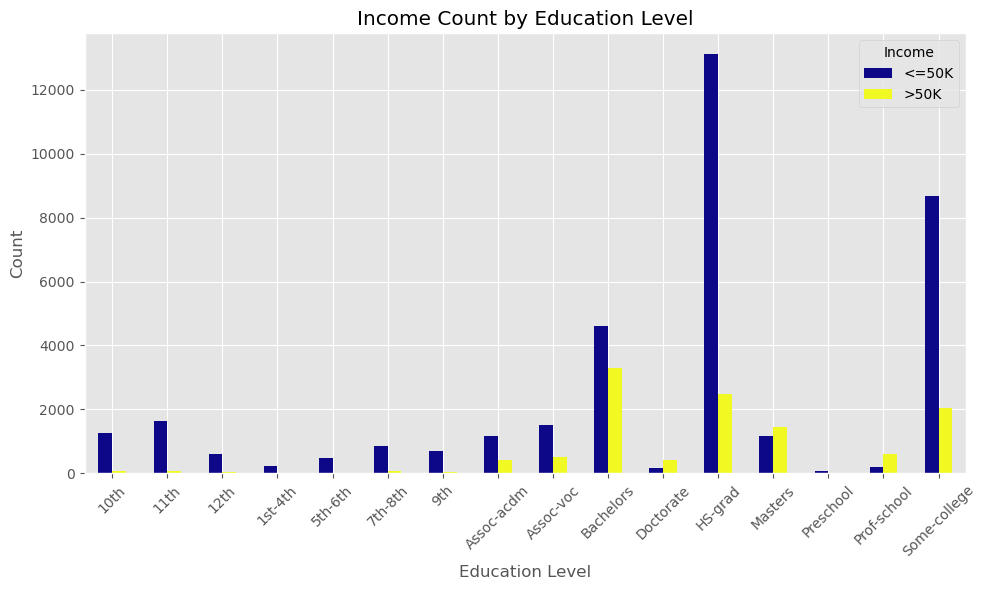

In [104]:
#Count of people per education level by income
edu_income_counts = df.groupby(['education', 'income']).size().unstack(fill_value=0)

#Plotting count chart
edu_income_counts.plot(kind='bar', figsize=(10, 6), colormap='plasma')
plt.title('Income Count by Education Level')
plt.ylabel('Count')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

**Insight**
##### *The chart reveals that the workers whose falls under Bachelors degree earn greater than 50k per year when compared to other Levels of education while HS grad reveals that workers who fall in this category earn <50k per year.*

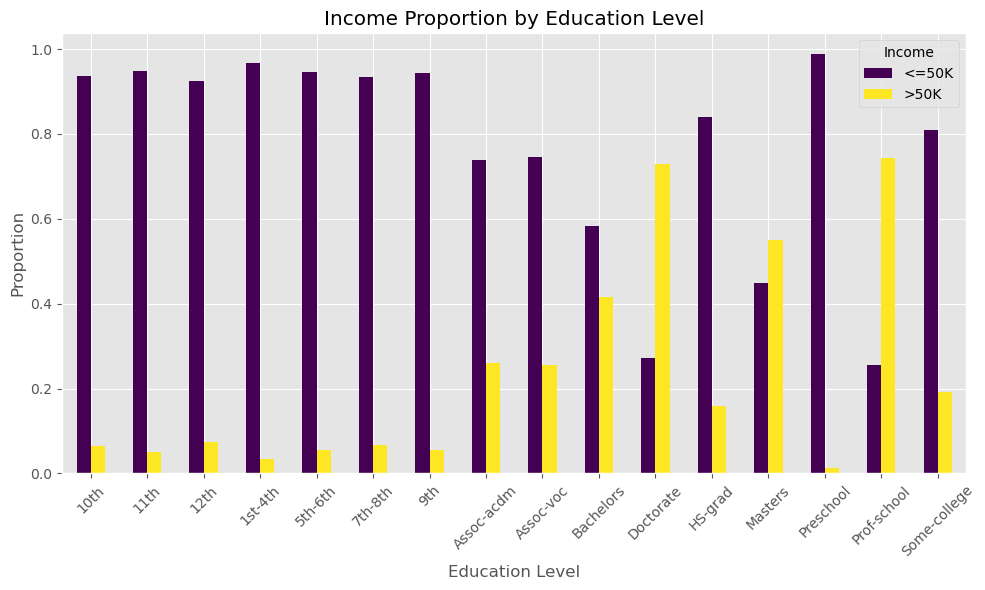

In [107]:
# Proportions 
edu_income_prop = df.groupby('education')['income'].value_counts(normalize=True).unstack()

# Plotting bar chart of proportions
edu_income_prop.plot(kind='bar', stacked=False, figsize=(10, 6), colormap='viridis')
plt.title('Income Proportion by Education Level')
plt.ylabel('Proportion')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

**Insight**
##### *The chart above reveals that some educational level like Prof-School, Doctorate, Masters show a relatively higher percentage of individuals earning above 50K, indicating that educational level might influence income.*

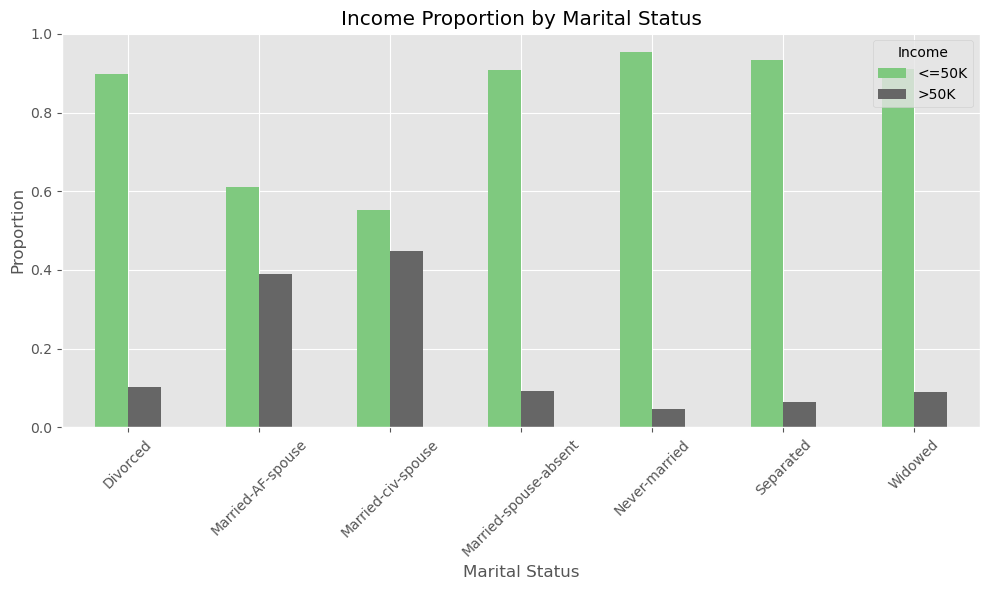

In [110]:
# Normalized bar chart
marital_income_prop = df.groupby('marital-status')['income'].value_counts(normalize=True).unstack()
marital_income_prop.plot(kind='bar', figsize=(10, 6), colormap='Accent')

plt.title('Income Proportion by Marital Status')
plt.ylabel('Proportion')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.tight_layout()
plt.show()

##### *This chart above reveals that greater percentage of Married-civ spouse earn above 50k per year.*

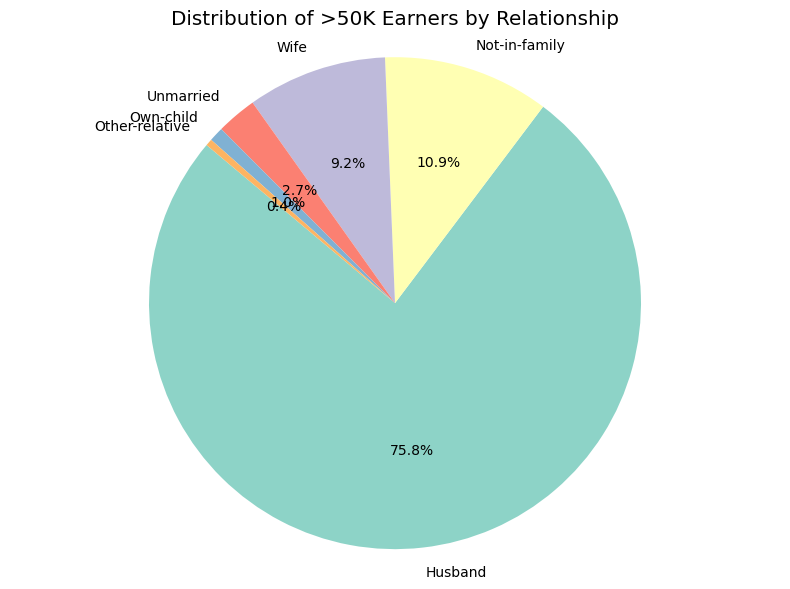

In [113]:
#Pie chart showing only >50K share by relationship
relationship_50k = df[df['income'] == '>50K']['relationship'].value_counts()

#Plotting pie chart
plt.figure(figsize=(8, 6))
colors = plt.cm.Set3.colors
plt.pie(relationship_50k, labels=relationship_50k.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of >50K Earners by Relationship')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### *This pie chart above reveals that "Husband" is usually dominant among high earners.*

In [116]:
# Create workclass-income summary table
workclass_income = df.groupby(['workclass', 'income']).size().unstack(fill_value=0)
workclass_income['Total'] = workclass_income.sum(axis=1)
workclass_income['% >50K'] = round((workclass_income['>50K'] / workclass_income['Total']) * 100, 2)
workclass_income = workclass_income.sort_values('% >50K', ascending=False)
print(workclass_income)

income            <=50K  >50K  Total  % >50K
workclass                                   
Self-emp-inc        749   936   1685   55.55
Federal-gov         861   559   1420   39.37
Local-gov          2186   926   3112   29.76
Self-emp-not-inc   2714  1061   3775   28.11
State-gov          1433   526   1959   26.85
Private           26201  7360  33561   21.93
Without-pay          19     2     21    9.52
Missing            2313   239   2552    9.37
Never-worked          9     0      9    0.00


This above workclass-income summary table shows that self-emp-inc is assosciated with a greater income.

In [119]:
# Occupation summary with high-income %
occupation_income = df.groupby(['occupation', 'income']).size().unstack(fill_value=0)
occupation_income['Total'] = occupation_income.sum(axis=1)
occupation_income['% >50K'] = round((occupation_income['>50K'] / occupation_income['Total']) * 100, 2)
occupation_income = occupation_income.sort_values('% >50K', ascending=False)
print(occupation_income.head(10))  # Show top 10

income             <=50K  >50K  Total  % >50K
occupation                                   
Exec-managerial     3147  2899   6046   47.95
Prof-specialty      3314  2764   6078   45.48
Armed-Forces           9     5     14   35.71
Protective-serv      670   307    977   31.42
Tech-support        1016   420   1436   29.25
Sales               3955  1470   5425   27.10
Craft-repair        4696  1378   6074   22.69
Transport-moving    1871   479   2350   20.38
Adm-clerical        4781   762   5543   13.75
Machine-op-inspct   2635   371   3006   12.34


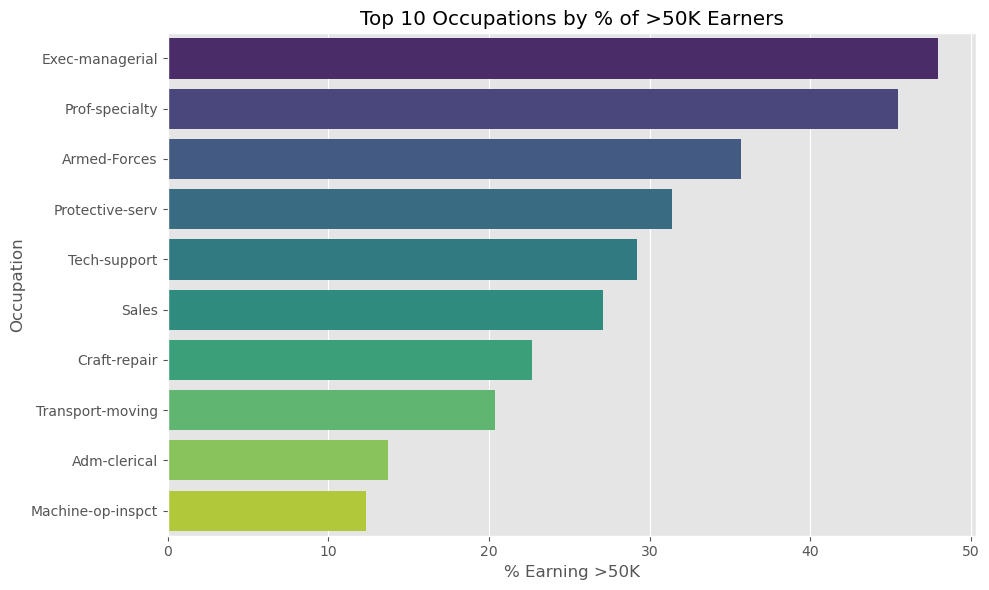

In [121]:
# Plot top 10 occupations by % >50K
top_occ = occupation_income.sort_values('% >50K', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_occ['% >50K'], y=top_occ.index, palette='viridis')
#top_occ.index
plt.title('Top 10 Occupations by % of >50K Earners')
plt.xlabel('% Earning >50K')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

##### *The Horizontal bar chart reveals that  Exec-managerial office gives a better percentage earning*

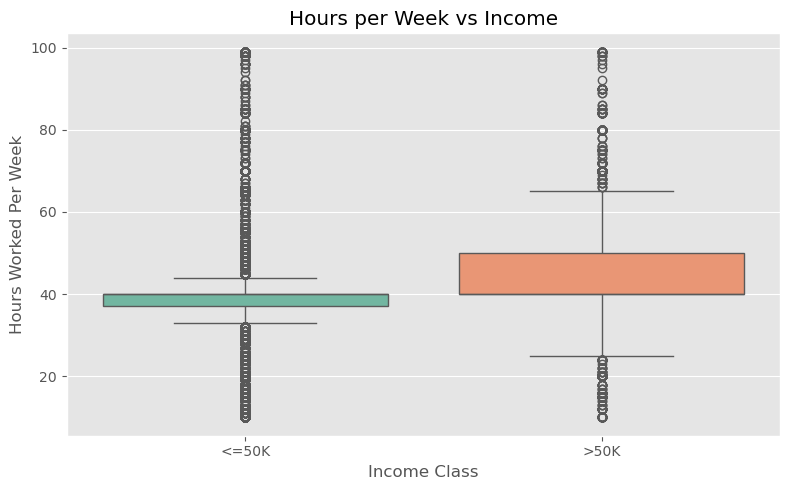

In [124]:
#Hours-per-Week vs Income
plt.figure(figsize=(8, 5))
sns.boxplot(x='income', y='hours-per-week', data=df, palette='Set2')

plt.title('Hours per Week vs Income')
plt.ylabel('Hours Worked Per Week')
plt.xlabel('Income Class')
plt.tight_layout()
plt.show()

##### *The box plot above reveals that on an average people who worked more hours per week earned greater than 50k*

#### DATA PREPROCESSING ####

In [128]:
#Encoding target - using label encoder
income_label = LabelEncoder()
df['income'] = income_label.fit_transform(df['income'])
print(income_label.classes_) #checking the classes my label was split to

# Separating features and target
X = df.drop('income', axis=1)
y = df['income']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print ("X_train shape:",X_train.shape)
print ('X_test shape:',X_test.shape)
print("y_train shape:",y_train.shape)
print ("y_test shape:",y_test.shape)

['<=50K' '>50K']
X_train shape: (38475, 12)
X_test shape: (9619, 12)
y_train shape: (38475,)
y_test shape: (9619,)


In [134]:
#seperate numerical and categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

#Building preprocessors
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_transformer = StandardScaler()

# Combine using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numerical_transformer, numerical_cols)
    ]
)

In [136]:
# Define classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42,max_depth = 10),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [152]:
# Create pipeline
logreg_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])
# Fit model
logreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

Logistic Regression Metric Result
Accuracy Score: 0.853519076827113
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7297
        >50K       0.74      0.60      0.67      2322

    accuracy                           0.85      9619
   macro avg       0.81      0.77      0.79      9619
weighted avg       0.85      0.85      0.85      9619

Confusion Matrix:
 [[6811  486]
 [ 923 1399]]
ROC AUC Score: 0.9108874459870887


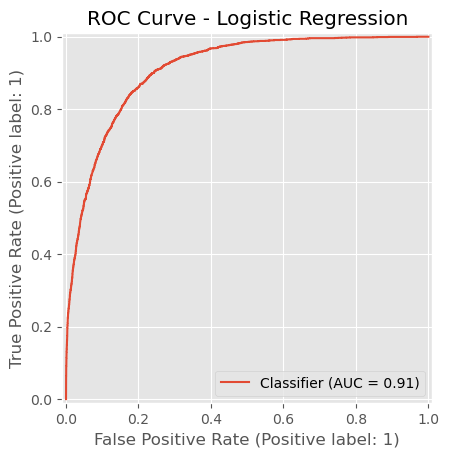

In [154]:
# Predict
y_pred = logreg_pipe.predict(X_test)
y_proba = logreg_pipe.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Metric Result")
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred,target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Logistic Regression")
plt.grid(True)
plt.show()

In [156]:
#Creating a Decision Tree pipeline
tree_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
#Fit model
tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

Decision Tree Metrics
Accuracy Score: 0.8208753508680736
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.89      0.88      7297
        >50K       0.64      0.61      0.62      2322

    accuracy                           0.82      9619
   macro avg       0.76      0.75      0.75      9619
weighted avg       0.82      0.82      0.82      9619

Confusion Matrix:
 [[6488  809]
 [ 914 1408]]
ROC AUC Score: 0.7740577080453934


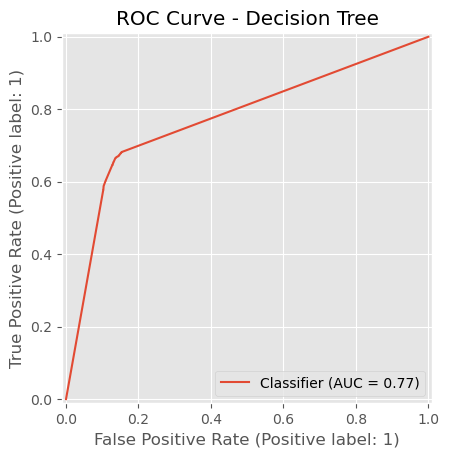

In [158]:
#Prediction
y_pred = tree_pipe.predict(X_test)
y_proba = tree_pipe.predict_proba(X_test)[:, 1]

#Evaluation 
print("Decision Tree Metrics")
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Decision Tree")
plt.grid(True)
plt.show()

In [160]:
# Creating a RandomForest pipeline
rf_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit model
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

Random Forest
Accuracy Score: 0.8444744775964237
Clasification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7297
        >50K       0.71      0.61      0.65      2322

    accuracy                           0.84      9619
   macro avg       0.79      0.76      0.78      9619
weighted avg       0.84      0.84      0.84      9619

Confusion Matrix:
 [[6712  585]
 [ 911 1411]]
ROC AUC Score: 0.8906243489442702


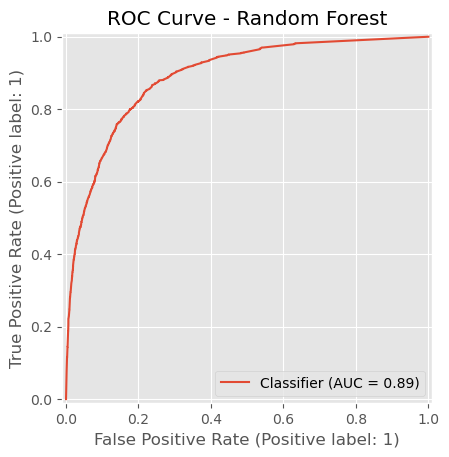

In [162]:
#Prediction
y_pred = rf_pipe.predict(X_test)
y_proba = rf_pipe.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Clasification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Random Forest")
plt.grid(True)
plt.show()

In [164]:
#Creating a Suppport Vector Machine pipeline
svm_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])
#Fit model
svm_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier', SVC(probability=True, random_state=42))])

SVM
Accuracy Score: 0.856741865058738
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      7297
        >50K       0.76      0.59      0.66      2322

    accuracy                           0.86      9619
   macro avg       0.82      0.77      0.79      9619
weighted avg       0.85      0.86      0.85      9619

Confusion Matrix:
 [[6876  421]
 [ 957 1365]]
ROC AUC Score: 0.9006767969610298


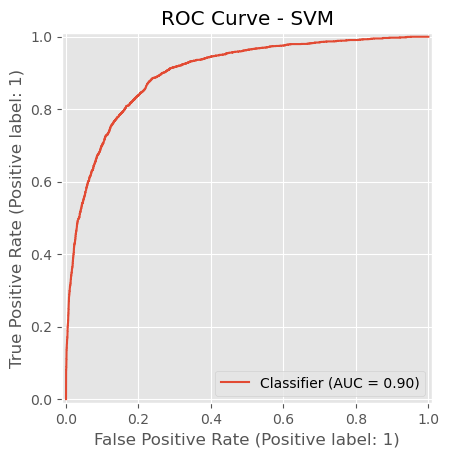

In [143]:
#Prediction
y_pred = svm_pipe.predict(X_test)
y_proba = svm_pipe.predict_proba(X_test)[:, 1]

#Evaluation
print("SVM")
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - SVM")
plt.grid(True)
plt.show()

In [138]:
# Create pipeline
xgb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))
])

# Fit model
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier',
                 XGBClassifier(base_sc...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

XGBoost
Accuracy Score: 0.8744152198773262
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      7297
        >50K       0.78      0.66      0.72      2322

    accuracy                           0.87      9619
   macro avg       0.84      0.80      0.82      9619
weighted avg       0.87      0.87      0.87      9619

Confusion Matrix:
 [[6874  423]
 [ 785 1537]]
ROC AUC Score: 0.9324483460867958


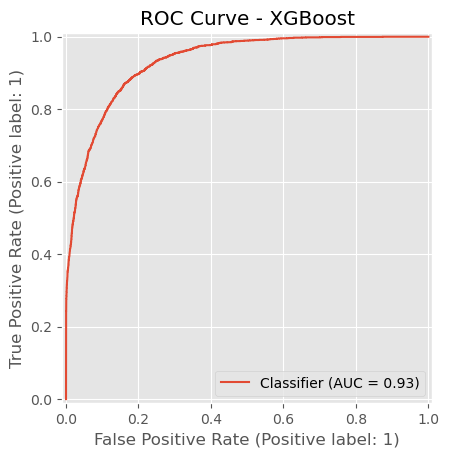

In [140]:
#Prediction
y_pred = xgb_pipe.predict(X_test)
y_proba = xgb_pipe.predict_proba(X_test)[:, 1]

#Evaluation
print("XGBoost")
print("Accuracy Score:", accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - XGBoost")
plt.grid(True)
plt.show()

### Model Performance - Before Hyperparameter Tuning

Below is a summary of how each model performed before hyperparameter tuning. The focus was on the minority class (`>50K`) since this is the target of interest in the income prediction task.

| Model               | Accuracy | Precision (>50K) | Recall (>50K) | F1 (>50K) | ROC AUC |
|--------------------|----------|------------------|---------------|-----------|---------|
| **Logistic Regression** | 0.85     | 0.74             | 0.60          | 0.67      | 0.91    |
| **Decision Tree**        | 0.82     | 0.64             | 0.61          | 0.62      | 0.77    |
| **Random Forest**        | 0.84     | 0.71             | 0.61          | 0.65      | 0.89    |
| **SVM**                  | 0.86     | 0.76             | 0.59          | 0.66      | 0.90    |
| **XGBoost**              | **0.87** | **0.78**         | **0.66**      | **0.72**  | **0.93** |

### Interpretation & Recommendations

#### 1. **Best Model: XGBoost**
- XGBoost delivered the best results across all key metrics.
- It achieved the highest accuracy (87%), F1-score (0.72), and ROC AUC (0.93).
- It clearly stands out in distinguishing between low and high-income earners.
- This model would be my first choice for deployment, especially when maximum predictive power is needed and training time is not a major concern.

#### 2. **Decision Tree Performed Worst**
- With a low ROC AUC of 0.77, it shows weak separation between income classes.
- It is also more susceptible to overfitting and may not generalize well.
- I do not recommend it for deployment in this use case.

#### 3. **Logistic Regression**
- Although it's a linear model, it showed strong performance with a high ROC AUC of 0.91.
- It's fast, interpretable, and serves as a reliable baseline.
- I would consider it if model transparency and simplicity are important.

#### 4. **Random Forest**
- More stable and robust than a single decision tree.
- While not as powerful as XGBoost, it’s still a solid performer.
- A good alternative when training time needs to be faster or when interpretability is a bit more desirable.

#### 5. **SVM: High Precision but Lower Recall**
- The model showed high precision (0.76), indicating fewer false positives.
- However, its lower recall (0.59) suggests that it misses many actual `>50K` earners.
- Could be useful in situations where false positives are costly, but not ideal if capturing most `>50K` cases is the priority.

### ✅ Next Steps Taken

After evaluating these initial results, I proceeded with the following steps:

1. I initiated **hyperparameter tuning** to further optimize the performance of each model.
2. I planned to **plot all ROC curves** on a single graph using `matplotlib` for visual comparison.
3. I will **save the final models** that perform best for potential deployment or further experimentation.

#### HYPERPARAMETER TUNING ####

In [166]:
# Defining Logistic Regression parameter grid
logreg_param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],  # Only 'l2' works with solver='lbfgs',
    'classifier__class_weight': ['balanced']
}
#GridSearch
logreg_grid = GridSearchCV(logreg_pipe, param_grid=logreg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
logreg_grid.fit(X_train, y_train)
# Results
print("Best Logistic Regression Parameters:", logreg_grid.best_params_)
print("Best ROC AUC Score:", logreg_grid.best_score_)

Best Logistic Regression Parameters: {'classifier__C': 1, 'classifier__class_weight': 'balanced', 'classifier__penalty': 'l2'}
Best ROC AUC Score: 0.9048456342201204


In [168]:
#Defining Decision tree parameters grid
tree_param_grid = {
    'classifier__max_depth': [5, 10, 15, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__class_weight': ['balanced']
}
#GridSearch
tree_grid = GridSearchCV(tree_pipe, param_grid=tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid.fit(X_train, y_train)
#Results
print("Best Decision Tree Parameters:", tree_grid.best_params_)
print("Best ROC AUC Score:", tree_grid.best_score_)

Best Decision Tree Parameters: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 10}
Best ROC AUC Score: 0.8940186269693177


In [170]:
#Defining RandomForest parameters grid
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__class_weight': ['balanced']
}
#GridSearch
rf_grid = GridSearchCV(rf_pipe, param_grid=rf_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
rf_grid.fit(X_train, y_train)
#Results
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best ROC AUC Score:", rf_grid.best_score_)

Best Random Forest Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 20, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}
Best ROC AUC Score: 0.9146287683269255


In [142]:
#Defining Xgboost Parameter grid
xgb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__scale_pos_weight': [1, 3]
}
#GridSearch
xgb_grid = GridSearchCV(xgb_pipe, param_grid=xgb_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
#Results
print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best ROC AUC Score:", xgb_grid.best_score_)

Best XGBoost Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__n_estimators': 200, 'classifier__scale_pos_weight': 3}
Best ROC AUC Score: 0.9281361086072893


### MODEL TRAINING AFTER HYPERPARAMETER TUNING ###

In [172]:
#Final Logistic Regression Pipeline
logreg_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(C=1, penalty='l2', max_iter=1000, random_state=42,class_weight="balanced"))
])
#fit the model
logreg_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier',
                 LogisticRegression(C=1, class_weight='balanced', max_iter=1000,
                                    random_state=42))])


Final Logistic Regression Metric
Accuracy Score: 0.8157812662438922
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.95      0.80      0.87      7297
        >50K       0.58      0.86      0.69      2322

    accuracy                           0.82      9619
   macro avg       0.76      0.83      0.78      9619
weighted avg       0.86      0.82      0.83      9619

Confusion Matrix:
 [[5847 1450]
 [ 322 2000]]
ROC AUC Score: 0.9109619282380628


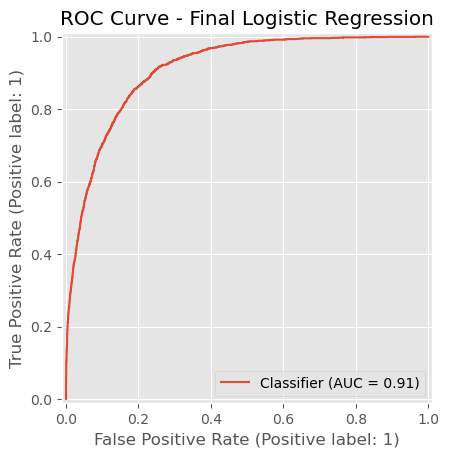

In [174]:
#Prediction
y_pred = logreg_final.predict(X_test)
y_proba = logreg_final.predict_proba(X_test)[:, 1]
#Evaluation
print("\nFinal Logistic Regression Metric")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Final Logistic Regression")
plt.grid(True)
plt.show()

In [176]:
#Final Decision Tree Pipeline
tree_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, min_samples_split=10, criterion='gini', random_state=42,class_weight='balanced'))
])
#Fit the model
tree_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                                        min_samples_split=10,
                                        random_state=42))])


Final Decision Tree Metrics
Accuracy Score: 0.7816820875350868
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.96      0.74      0.84      7297
        >50K       0.53      0.90      0.66      2322

    accuracy                           0.78      9619
   macro avg       0.74      0.82      0.75      9619
weighted avg       0.85      0.78      0.80      9619

Confusion Matrix:
 [[5435 1862]
 [ 238 2084]]
ROC AUC Score: 0.9012615888657651


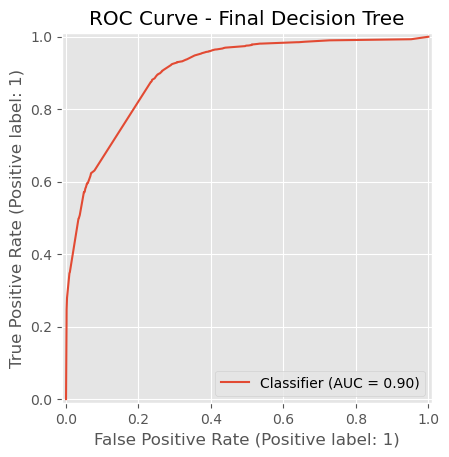

In [178]:
#Predict
y_pred = tree_final.predict(X_test)
y_proba = tree_final.predict_proba(X_test)[:, 1]

#Evaluation
print("\nFinal Decision Tree Metrics")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Final Decision Tree")
plt.grid(True)
plt.show()

In [180]:
#Final Random Forest Pipeline
rf_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=10, random_state=42,class_weight='balanced'))
])
#Fit the model
rf_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        min_samples_split=10, n_estimators=200,
                                        random_state=42))])


Final Random Forest
Accuracy Score: 0.8300239110094605
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.95      0.82      0.88      7297
        >50K       0.60      0.86      0.71      2322

    accuracy                           0.83      9619
   macro avg       0.78      0.84      0.79      9619
weighted avg       0.87      0.83      0.84      9619

Confusion Matrix:
 [[5983 1314]
 [ 321 2001]]
ROC AUC Score: 0.9210519419859992


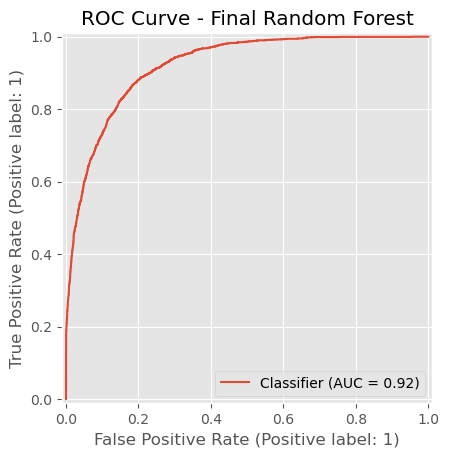

In [182]:
#Predict
y_pred = rf_final.predict(X_test)
y_proba = rf_final.predict_proba(X_test)[:, 1]

#Evaluation
print("\nFinal Random Forest")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Final Random Forest")
plt.grid(True)
plt.show()

In [144]:
#Final XGBoost Pipeline
xgb_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=200, 
                                 eval_metric='logloss', random_state=42,scale_pos_weight=3))
])
#Fit the model
xgb_final.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num', StandardScaler(),
                                                  ['age', 'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week'])])),
                ('classifier',
                 XGBClassifier(base_sc...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])


Final XGBoost
Accuracy Score: 0.8423952593824722
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.96      0.83      0.89      7297
        >50K       0.62      0.88      0.73      2322

    accuracy                           0.84      9619
   macro avg       0.79      0.85      0.81      9619
weighted avg       0.88      0.84      0.85      9619

Confusion Matrix:
 [[6066 1231]
 [ 285 2037]]
ROC AUC Score: 0.9328534834971057


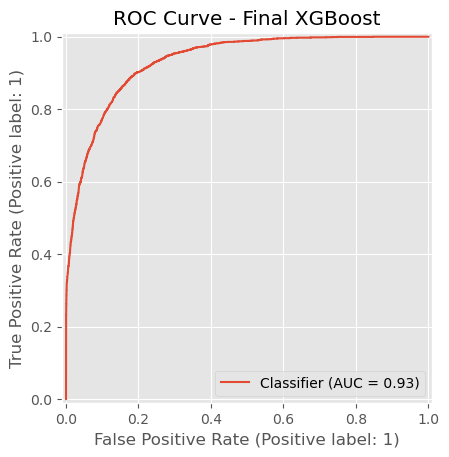

In [146]:
#Predict
xgb_final.fit(X_train, y_train)
y_pred = xgb_final.predict(X_test)
y_proba = xgb_final.predict_proba(X_test)[:, 1]

#Evaluation
print("\nFinal XGBoost")
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Final XGBoost")
plt.grid(True)
plt.show()

#### Final Model Comparison Summary (After Hyperparameter Tuning)

After training and hyperparameter tuning four classification models, I evaluated them using accuracy, precision, recall, F1-score, ROC AUC, and confusion matrices—particularly focusing on the performance of the minority class (`>50K`). Below is a comparative summary of the final tuned models:

| Metric                 | Logistic Regression | Decision Tree | Random Forest | XGBoost |
|------------------------|---------------------|----------------|----------------|----------|
| **Accuracy**           | 0.816               | 0.782          | 0.830          | **0.842** |
| **Precision (>50K)**   | 0.58                | 0.53           | 0.60           | **0.62**  |
| **Recall (>50K)**      | 0.86                | **0.90**       | 0.86           | 0.88     |
| **F1 Score (>50K)**    | 0.69                | 0.66           | 0.71           | **0.73**  |
| **ROC AUC Score**      | 0.911               | 0.901          | 0.921          | **0.933** |
| **False Negatives**    | 322                 | **238**        | 321            | 285      |

#### Interpretation and Insights

- **XGBoost** emerged as the strongest performer across almost all metrics. It achieved the highest accuracy (84.2%) and F1-score (0.73), indicating excellent balance between precision and recall. Its ROC AUC score of 0.933 further shows that it effectively separates the classes, even with the class imbalance. With a relatively low number of false negatives (285), it’s especially good at identifying individuals who earn more than 50K.

- **Random Forest** also performed very well, with slightly lower scores than XGBoost. It maintained a strong F1-score (0.71) and a ROC AUC of 0.921. It can be considered a solid alternative when interpretability and training speed are factors.

- **Logistic Regression**, though a simpler model, performed surprisingly well with a high recall of 0.86. However, its lower precision (0.58) means it misclassifies more people as earning `>50K` when they do not. Still, it remains a reliable baseline model and is useful when interpretability is a priority.

- **Decision Tree** showed the highest recall (0.90), meaning it identified almost all of the actual `>50K` earners. However, its low precision (0.53) led to the highest number of false positives. This model may be suitable in cases where missing a true positive is more harmful than a false alarm, but it is more prone to overfitting.

#### Final Recommendation

Based on the evaluation, I recommend **XGBoost** as the final model for predicting income levels:

- It provides the **best overall performance** in terms of F1-score, AUC, and general accuracy.
- It handles the class imbalance well and makes fewer false negative errors, which is important when the goal is to correctly identify high earners.
- It strikes a good balance between **recall (0.88)** and **precision (0.62)**—important for use cases where both false positives and false negatives have implications.

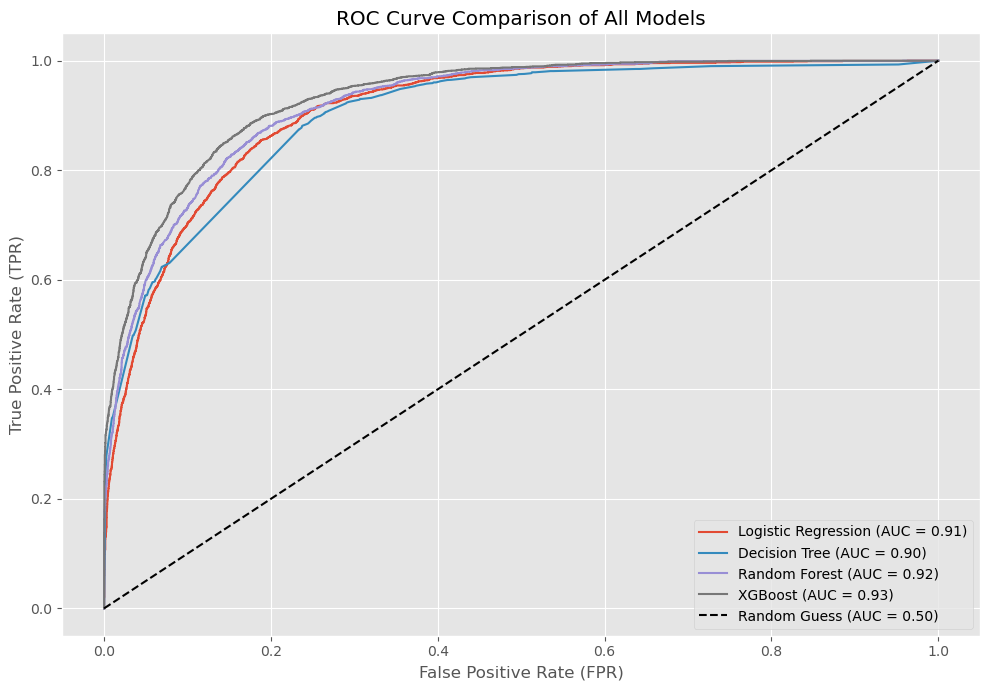

In [184]:
# Dictionary to store model names and their fitted instances
models = {
    "Logistic Regression": logreg_final,
    "Decision Tree": tree_final,
    "Random Forest": rf_final,
    "XGBoost": xgb_final,
}
plt.figure(figsize=(10, 7))
for name, model in models.items():
    #Get predicted probabilities for the positive class (class 1 = '>50K')
    y_probs = model.predict_proba(X_test)[:, 1]  # [:,1] gives P(class 1)

    #Calculate FPR, TPR
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    #Calculate AUC
    auc_score = roc_auc_score(y_test, y_probs)

    #Plot each model's ROC curve
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

#Plot baseline for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

plt.title("ROC Curve Comparison of All Models")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

#### ROC Curve Analysis

The ROC curve above shows the performance of all four models — Logistic Regression, Decision Tree, Random Forest, and XGBoost — in terms of their ability to distinguish between individuals earning `<=50K` and `>50K`.

From the plot:

- **XGBoost** consistently dominates the upper-left region of the graph, showing the best trade-off between True Positive Rate (TPR) and False Positive Rate (FPR). This is further supported by its highest ROC AUC score of **0.93**, indicating excellent class separation.

- **Random Forest** also performs strongly with a ROC AUC of **0.92**, closely trailing XGBoost.

- **Logistic Regression** shows competitive performance with a ROC AUC of **0.91**, especially for a linear model. It maintains a consistent curve but falls short in terms of precision and F1-score.

- **Decision Tree** performs the weakest, with a lower ROC AUC of **0.90**. Its curve is noticeably lower than the others, suggesting it's more prone to overfitting or under-generalization.

#### Final Justification

Based on the ROC-AUC comparison:

- I selected **XGBoost** as the final model for deployment or further analysis.  
- It not only shows superior performance across core metrics (accuracy, F1, precision, recall), but also achieves the **highest ROC AUC**, which confirms its ability to **reliably distinguish between income classes**, even with imbalanced data.
- This plot visually reinforces the numerical evaluation done earlier and provides a strong basis for choosing XGBoost as the optimal model.

### Summary and Recommendations

#### Key EDA Insights

Through my exploration of the dataset, I discovered several patterns and trends that strongly correlate with income level:

#### 1. Income is Clearly Imbalanced  
The dataset shows a serious imbalance between the two income groups. A much larger number of people earn less than or equal to 50K, making this a key factor to handle during model training, especially when predicting high-income earners.

#### 2. Age Has a Strong Influence on Income  
From the boxplot, it's clear that those who earn above 50K tend to be older. This suggests that age (and possibly experience) plays a major role in determining who earns more.

#### 3. Gender Disparity Still Exists  
I observed that while both men and women mostly fall under the <=50K category, a greater proportion of men are in the >50K group compared to women. This might reflect real-world gender disparities in income.

#### 4. Education Level Is a Game Changer  
Workers with Bachelor’s, Master’s, Doctorate, or Prof-School degrees have a noticeably higher chance of earning >50K. On the other hand, people with just a high school degree mostly fall in the <=50K group. Education clearly makes a big difference.

#### 5. Occupation and Marital Status Matter  
The Exec-managerial and Prof-specialty roles had more high earners. Also, people who are married (civ-spouse) tend to earn more than others. Interestingly, “Husbands” were dominant among high-income groups, hinting at a possible link between household role and income.

#### Model Performance Overview

After testing several models, including Logistic Regression, Decision Tree, Random Forest, and XGBoost, I selected **XGBoost** as the best performer.

- **XGBoost achieved the highest accuracy (84.2%)**, and **F1-score (0.73)** for the target class `>50K`.
- It also had the **highest ROC AUC score (0.933)**, showing excellent ability to distinguish between income classes — even with class imbalance.
- With low false negatives and strong recall (0.88), it proved effective in identifying high-income individuals.

#### Recommendations

- **Model Improvement**: To further improve prediction, I could explore additional feature engineering, such as creating interaction terms or using external economic indicators.

- **Bias Monitoring**: Since this dataset involves sensitive attributes (like race and gender), future iterations should include fairness checks to ensure the model is not biased.

- **Deployment Use**: This model can be used in financial screening, marketing targeting, or social research — especially for profiling income segments.

- **Next Steps**: I saved all my models to joblib for further use.

In [150]:
#Saving final XGBoost Model to joblib

joblib.dump(xgb_final, "my_XGBoost_model.pkl")

['my_XGBoost_model.pkl']

In [189]:
#Saving final RandomForest Model to joblib

joblib.dump(rf_final, "my_Random_Forest_model.pkl")

['my_Random_Forest_model.pkl']

In [191]:
#Saving final Decision Tree Model to joblib

joblib.dump(tree_final, "my_Decision_Tree_model.pkl")

['my_Decision_Tree_model.pkl']

In [193]:
#Saving final Logistic Regression Model to joblib

joblib.dump(logreg_final, "my_Logistic_Regression_model.pkl")

['my_Logistic_Regression_model.pkl']